# **Multidimensional Scaling (MDS)**


**Objectives:**

In this notebook we will start using Multidimensional Scaling (MDS) and apply it to the Iris dataset to discover hidden latent constructs.

> - [A] Importing MDS functionality from scikit-learn
> - [B] Extracting the coordinate matrix $\mathbf{C}$ and the stress value
> - [C] Correlations between $\mathbf{X}$ and $\mathbf{C}$
> - [D] Visualing the MDS solution
> - [E] Initializing the MDS object

---

We import the same packages and data as before:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets


def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

iris = datasets.load_iris()

# Load X, y, variable labels for the Iris data set
X = iris.data
y = iris.target
variable_labels = iris.feature_names

# Create a dataframe for X
X = pd.DataFrame(X, columns=variable_labels)

# We apply MDS to standardized data
X = X - X.mean()
X = X / X.std()

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


---
# [A] Importing MDS functionality from scikit-learn

We will use **scikit-learn** to estimate the coordinates **`C`** and the **`stress`** value for an MDS solution.

To use the **MDS** functionality from **scikit-learn** we have to **import** it. The MDS functionality can be found in the **`manifold`** subpackage of scikit-learn:

In [ ]:
from sklearn.manifold import MDS

As mentioned before, one of the advantages of working with **scikit-learn** is that the structure of working with different methods is made as similar as possible.

This means that the general workflow for **`MDS`** is similar to that of **`FactorAnalysis`** and **`PCA`**. This allows you to quickly pick up new methods. That general workflow is as follows:
> 1. Initialize a new object: in this case an **`MDS`** object
> 2. Call the `fit` method on the object using data to estimate the unknowns (every time when need estimate!!)
> 3. Interpret the results

Note that the first step, the **initialization** of the object, is **very important** for the behavior of **`MDS`**.

However, we will first look at the coordinate matrix **`C`** and the visualization of the MDS solution, before we dive into details about this initialization. Therefore, for the moment we will fit MDS using the default values:

- **`Note`**: The default dimensionality is equal to 2, instead of `P` (like in EFA and PCA)

In [ ]:
# Note: I am setting random_state here to 0, which is not the default value
# It will become more clear why I need to do this at the end of the notebook
mds = MDS(random_state=0)
mds.fit(X)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=0, verbose=0)

---
# [B] Extracting the coordinate matrix $\mathbf{C}$ and the stress value

The estimated $N \times L$ coordinate matrix **`C`** is stored in the **`embedding_`** attribute of the MDS object:

In [ ]:
C = mds.embedding_
C = pd.DataFrame(
    C,
    columns=['L1', 'L2'], # named the two dimensions L1 (horizontal) and L2 (vertical)
)

In [ ]:
C.round(2)           # flower that has same feature are placed in the similar area

,L1,L2
0,0.50,-2.27
1,1.49,-1.61
2,1.29,-2.02
3,1.51,-1.85
4,0.41,-2.45
...,...,...
145,-1.19,1.53
146,0.20,1.82
147,-0.89,1.27
148,-1.78,0.65


Each row of **`C`** returns the MDS coordinates ($L_1$ and $L_2$) $\mathbf{c}_i$ of an observation $i$.

For example, for observation with index 42 (corresponding to row 43):

In [ ]:
C.loc[42]             # Only use the values to visualize the dataset is enough

L1    1.529898
L2   -2.145101
Name: 42, dtype: float64

The other output value we are interested in is the **`stress`** value of the MDS solution.
- A low **`stress`** value (close to 0) is preferred
- It indicates that the MDS coordinates **`C`** **fit well** to the dissimilarities $\mathbf{\Delta}$ in the data

The **`stress`** value is stored in the **`stress_`** attribute of the MDS object:


In [ ]:
stress = mds.stress_
stress

234.37226998248022

**!! IMPORTANT !!**
> **`Note`**: Only compare **stress** values between MDS solutions if the dissimilarity matrix is the same!

Comparing **stress** values for different dissimilarity matrices does not make any sense!

We will look at the **`stress`** value in more detail when we consider the initialization of the MDS object. 

---
# [C] Correlations between $\mathbf{X}$ and $\mathbf{C}$

To get a sense what the two dimensions are about in the MDS solution, it is a good idea to inspect the **correlation** matrix between the $P$ variables in the original data matrix $\mathbf{X}$ and the $L$-dimensional coordinates in $\mathbf{C}$
> We have seen this before when interpreting PCA and EFA loadings

In [ ]:
X_C_corr = compute_corr_X_Z(X, C)
X_C_corr

,L1,L2
sepal length (cm),-0.829379,0.776635
sepal width (cm),-0.409043,-0.665707
petal length (cm),-0.631025,0.953061
petal width (cm),-0.651085,0.913898


We will get to the interpretation of these correlations once we start visualizing the MDS solution.

---
# [D] Visualizing the MDS solution

The primary strength of MDS is that it allows you to visualize your (potentially high-dimensional) observations in a lower-dimensional space, by default in 2 dimensions, while keeping in mind how "dissimilar" the observations are to each other. 

> In this lower-dimensional space you can (more easily) identify groups of observations, or relations between certain observations, that may provide additional insights from the data.

We start the visualization with a scatter plot, similar to the ones we have seen before:

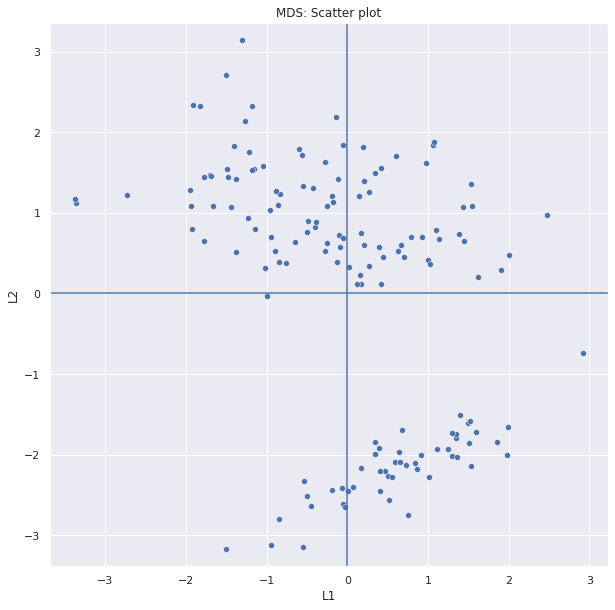

In [ ]:
plt.figure(figsize=(10, 10))

# create line for the axes
plt.axhline(0)
plt.axvline(0)

# create a scatterplot of the MDS coordinates
sns.scatterplot(
    x='L1',
    y='L2',
    data=C,
)
plt.axis('equal')

plt.title('MDS: Scatter plot')
plt.show()

A few things to note here:
- **The labels on the axes have no direct meaning**: They correspond to the first and second coordinates of the MDS solution

- **Distances in the MDS scatter plot are informative**:
 - Points that are **close** to each other are more **similar**
 - Points that are **further away** from each other are more **dissimilar**

Notice that two groups of observations seem to form in this MDS solution:
- Group 1: Observations with a **positive value** for $L_2$, the second (vertical) dimension of the MDS solution
- Group 2: Observations with a **negative value** for $L_2$, the second (vertical) dimension of the MDS solution

To gain more insight in what these groups actually represent, we can plot the correlations of each of the original $P$ variables in $\mathbf{X}$ into this scatter plot.
- We have stored these correlations in the **`X_C_corr`** variable that we computed before.
- Plotting these in the same plot as the MDS coordinates results in a plot that is very similar in interpretation to a **biplot**

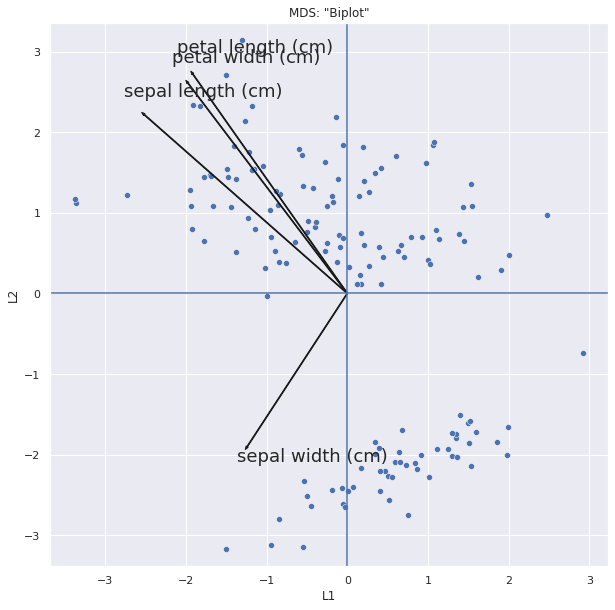

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

# create line for the axes
plt.axhline(0)
plt.axvline(0)

# create a scatterplot of the MDS coordinates
sns.scatterplot(
    x='L1',
    y='L2',
    data=C,
)
plt.axis('equal')

abs_xlim = 0.9 * np.max(np.abs(C.iloc[:, 0]))
abs_ylim = 0.9 * np.max(np.abs(C.iloc[:, 1]))

for variable in X_C_corr.index.values:
    ax.arrow(
        x=0,
        y=0,
        dx=X_C_corr.loc[variable]['L1'] * abs_xlim,
        dy=X_C_corr.loc[variable]['L2'] * abs_ylim,
        width=0.01,
        color='k'
    )

    ax.text(
        x=1.1*X_C_corr.loc[variable]['L1'] * abs_xlim,
        y=1.1*X_C_corr.loc[variable]['L2'] * abs_ylim,
        s=variable,
        fontsize=18,
    )

plt.title('MDS: "Biplot"')
plt.show()

Let's first focus on Group 2, which corresponds to $L_2 < 0$
- Sepal width for this group is expected to be **above** average
 - Reason: Data points in Group 2 are (somewhat) located in the direction of the arrow for sepal width
- Sepal length, petal width, and petal length are expected to be **below** average
 - Reason: Data points in Group 2 are located in the **opposite** direction of the arrows for sepal length, petal length, petal width

To verify this interpretation, we can only select the observations in the data that belong to Group 2 (that is, for which $L_2 < 0$), and compute the mean of the original variables in the data matrix **`X`**.

In [ ]:
G2_selection = C.loc[:, 'L2'] < 0
G2_selection

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: L2, Length: 150, dtype: bool

Now, use the `G2_selection` variable to compute the mean of the original variables:

In [ ]:
X.loc[G2_selection].mean()

sepal length (cm)   -0.987654
sepal width (cm)     0.849154
petal length (cm)   -1.266886
petal width (cm)    -1.215873
dtype: float64

Remember!
- The variables in $\mathbf{X}$ are all standardized!
- If an observation is positive, it has an above average value
- If an observation is negative, it has a below average value

- $L_1$
 - Strongly **negatively** correlated with sepal length, so a **large positive value** for $L_1$ indicates that this observation will most likely have a **large negative value** for sepal length (and vice versa)
 - Also relatively strongly **negatively** correlated with the two petal length variables
 - Combining this: **Large positive scores** for $L_1$ most likely correspond to flowers that have a **below average** sepal length and a **below average** petal length and width. 
- $L_2$
 - Strongly positively correlated with sepal length, petal length, and petal width
 - Combining this: **Large positive scores** for $L_2$ most likely correspond to flowers that have an **above average** sepal length and an **above average** petal length and width.
- For this simple Iris dataset $L_1$ and $L_2$ are a bit redundant 

Similarly, for Group 1, which corresponds to $L_2 > 0$:

In [ ]:
G1_selection = C.loc[:, 'L2'] > 0
X.loc[G1_selection].mean()

sepal length (cm)    0.508792
sepal width (cm)    -0.437443
petal length (cm)    0.652638
petal width (cm)     0.626359
dtype: float64

We do observe a below average mean for sepal width, as was to be expected
- However, for the other 3 variables we should probably break up Group 1 in a low $L_1$ score subgroup and a high $L_1$ score subgroup

First the low $L_1$ score subgroup, i.e. if $L_1 < 0$:

In [ ]:
X.loc[G1_selection & (C.loc[:, 'L1'] < 0)].mean()

sepal length (cm)    0.974157
sepal width (cm)    -0.035944
petal length (cm)    0.893333
petal width (cm)     0.906104
dtype: float64

For this subgroup the variable means are according to expectation:
- Sepal width is approximately **orthogonal** to this subgroup, and therefore relatively close to zero
- The other values are large and positive, which was to be expected due to the positive correlations of these variables with $L_2$ and the negative correlations with $L_1$ (visualized using the arrows in the plot)

Next, the high $L_1$ score subgroup, i.e. if $L_1 > 0$:

In [ ]:
X.loc[G1_selection & (C.loc[:, 'L1'] > 0)].mean()

sepal length (cm)   -0.207156
sepal width (cm)    -1.055134
petal length (cm)    0.282338
petal width (cm)     0.195982
dtype: float64

Again the expectations are largely what we expect here, based on the plotted correlations in the plot:
- Sepal width is negative, as this subgroup is located in the **opposite** direction of the arrow for sepal width
- The other variables are relatively close to zero, because this subgroup is more or less **orthogonal** to these arrows

## Using the dependent variable （y） in your plots

So far we have worked exclusively using the data matrix **`X`**
- However, for many data sets you also have a **`y`** variable available
- This variable can be used to provide further insight in your MDS plots

The **`y`** variable for the Iris data set is a **Categorical** variable
- It identifies to which **known** class (out of 3) each flower in the data set belongs

We can use that information to create a pandas Series with the class label for each observation in the data set:

In [ ]:
y_group = pd.Series(y) 

for group_idx, group_name in enumerate(iris.target_names):
    y_group[y_group == group_idx] = group_name

y_group

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

Now, we can add the **`y_group`** information to our scatter plot, by setting the **`style`** and **`hue`** arguments in the call to **`sns.scatterplot`** equal to this variable:

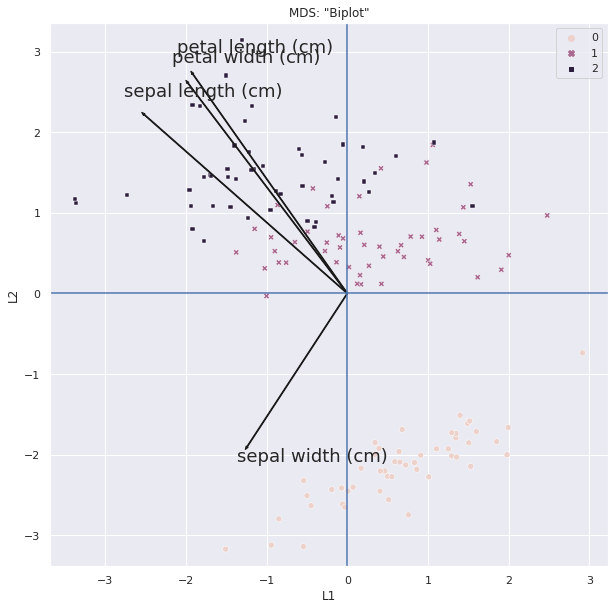

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

# create line for the axes
plt.axhline(0)
plt.axvline(0)

# create a scatterplot of the MDS coordinates
sns.scatterplot(
    x='L1',
    y='L2',
    data=C,
    # THE 2 LINES BELOW ARE NOW ADDED
    style=y_group,
    hue=y_group,
)
plt.axis('equal')

abs_xlim = 0.9 * np.max(np.abs(C.iloc[:, 0]))
abs_ylim = 0.9 * np.max(np.abs(C.iloc[:, 1]))

for variable in X_C_corr.index.values:
    ax.arrow(
        x=0,
        y=0,
        dx=X_C_corr.loc[variable]['L1'] * abs_xlim,
        dy=X_C_corr.loc[variable]['L2'] * abs_ylim,
        width=0.01,
        color='k'
    )

    ax.text(
        x=1.1*X_C_corr.loc[variable]['L1'] * abs_xlim,
        y=1.1*X_C_corr.loc[variable]['L2'] * abs_ylim,
        s=variable,
        fontsize=18,
    )

plt.title('MDS: "Biplot"')
plt.show()

Even if your dependent variable **`y`** is not a Categorical variable, you could still use its information to help visualize your data
- For example, if **`y`** is a metric variable (interval or ratio), you could create a group for the observations that have an above average **`y`** value and another group for the observations that have a below average **`y`** value
- As a researcher you should then explore if including that information in your MDS plot makes it easier to interpret the MDS plot.

---
# [E] Initializing the MDS object

A proper initialization of the **`MDS`** object in scikit-learn is important
- Often, we want to initialize the MDS object using parameter values that are **not** equal to their default values
- This is in contrast to the other methods in scikit-learn we have seen so far (except for the `n_components` option in EFA)

Below we will discuss setting the following options:
> - **`random_state`**
> - **`n_components`**
> - **`dissimilarity`**
> - **`n_init`**
> - **`max_iter`**

All these values will affect the MDS solution returned by scikit-learn, so it is important that you know how to set these variables yourself.

## **`random_state`**

MDS is a method that depends on the **starting values** (the initial values) of the $N \times L$ coordinate matrix **`C`**
- Different starting values will lead to different MDS solutions
- Typically these starting values are chosen at **random**
- The "random behavior" can be controlled using the **`random_state`** parameter of the MDS object

Analyzing **`random_state`**:
- **`random_state = None`** (default value)
 - This is the default value for **`random_state`**
 - This will result in a different MDS solution every time you call MDS
 - **Do not use this default value**: Your results will not be replicable!
- **`random_state = a_non_negative_int`**
 - You can set **`random_state`** to any non-negative integer value
 - For example: 0, 1, 2020, 744
 - Your MDS results will now be reproducible
 - **You should always (!!!) specify a value for `random_state`**

Let's look at this in practice: In the cells below we will create two different MDS objects and find their solutions using the `fit` method:


In [ ]:
mds_1 = MDS().fit(X)
mds_2 = MDS().fit(X)

Let's compare the MDS solution between `mds_1` and `mds_2`:

In [ ]:
print(mds_1.embedding_[0])
print(mds_2.embedding_[0])
print(np.allclose(mds_1.embedding_, mds_2.embedding_))
print(mds_1.stress_)
print(mds_2.stress_)

[-0.85265531 -2.15789104]
[2.13194965 0.91926311]
False
233.8011409006825
233.6722946819684


The results between the two MDS objects are different, even though we are using the same data. By setting **`random_state`** in both MDS objects to the same value, we can ensure that the results in both MDS objects will be the same:

In [ ]:
mds_3 = MDS(random_state=744).fit(X)    # ramdom_state must be set (quiz考试)
mds_4 = MDS(random_state=744).fit(X)

Now let's compare the MDS solution between `mds_3` and `mds_4`:

In [ ]:
print(mds_3.embedding_[0])
print(mds_4.embedding_[0])
print(np.allclose(mds_3.embedding_, mds_4.embedding_))
print(mds_3.stress_)
print(mds_4.stress_)

[-1.54268661  1.73519162]
[-1.54268661  1.73519162]
True
233.81918940750143
233.81918940750143


Similarly, if we set different values for **`random_state`** the results will be different again:

In [ ]:
mds_5 = MDS(random_state=12345).fit(X)
mds_6 = MDS(random_state=67890).fit(X)

print(mds_5.embedding_[0])
print(mds_6.embedding_[0])
print(np.allclose(mds_5.embedding_, mds_6.embedding_))
print(mds_5.stress_)
print(mds_6.stress_)

[-1.7647252   1.50766383]
[-2.32049033  0.02215332]
False
234.0071238933445
233.74344536412528


To conclude:
> **You should always set a value for `random_state`, such that your MDS results are replicable**.

## **`n_components`**

The MDS coordinates are specified in a lower-dimensional space of dimensionality $L$
- The value for $L$ is set using the **`n_components`** parameter of the MDS object.

About **`n_components`**:
- **`n_components = 2`** (default value)
 - This will results in 2D coordinates, that can be visualized in a 2D scatter plot
- **`n_components = a_positive_int`**
 - You can set **`random_state`** to any positive integer value
 - However, MDS is intended for **visualization**. Therefore $L$ is typically set to 2 (the default) or 3

For example, if we set this value equal to 3 it will return 3D MDS coordinates:

In [ ]:
mds_3d = MDS(n_components=3).fit(X)

print(mds_3d.embedding_[0])

[ 0.1328985  -1.70698989 -1.55310079]


## **`dissimilarity`**

The MDS functionality in scikit-learn can handle two types of data:
- An $N \times N$ dissimilarity matrix $\mathbf{\Delta}$
- An $N \times P$ "regular" data matrix $\mathbf{X}$ with $N$ observations and $P$ variables

What type of data you are using can be specified using the **`dissimilarity`** parameter of the MDS object.

About **`dissimilarity`**:
- **`dissimilarity = 'euclidean'`** (default value)
 - The MDS object expects a **"regular" data** matrix $\mathbf{X}$ with dimensions $N \times P$
 - scikit-learn will automatically compute an $N \times N$ dissimilarity matrix $\mathbf{\Delta}$ based on $\mathbf{X}$, where $\delta_{i,j}$ is the **Euclidean distance** between observation $\mathbf{x}_i$ and observation $\mathbf{x}_j$
- **`dissimilarity = 'precomputed'`**
 - The MDS object expects a **precomputed dissimilarity** matrix with dimensions $N \times N$
 - For example: You could create a dissimilarity matrix that is **not** based on Euclidean distances, but on correlations instead (refer to the lecture slides)

Let's verify this. First, find the MDS solution based on the default value **`dissimilarity = 'euclidean'`** using the "regular" data matrix:

In [ ]:
mds_diss_eucl = MDS(random_state=0, dissimilarity='euclidean').fit(X)
print(mds_diss_eucl.embedding_[0]) # display first observation

[ 0.49893508 -2.267767  ]


Next, we should **precompute** the $N \times N$ matrix with Euclidean distances. Manually programming this requires some effort, so we can turn to functionality that is already present in scikit-learn:

In [ ]:
from sklearn.metrics import euclidean_distances
X_euc_dis = euclidean_distances(X)

**`X_euc_dis`** is now an $N \times N$ matrix with the Euclidean distances for each pair of observations from the original data matrix.

For example, the Euclidean distance of observation 0 to itself should be zero:

In [ ]:
X_euc_dis[0, 0]

0.0

The Euclidean distance between observation 0 and 1:

In [ ]:
X_euc_dis[0, 1]

1.1722913980470522

Let's verify that this is the same number as if we would have manually computed this Euclidean distance:

In [ ]:
np.sqrt(np.sum((X.iloc[0] - X.iloc[1])**2))

1.1722913980470522

Now we can initialize the MDS object using **`dissimilarity='precomputed'`** and use **`X_euc_dis`** instead of **`X`**:

In [ ]:
mds_diss_prec = MDS(random_state=0, dissimilarity='precomputed').fit(X_euc_dis)

# verify that the results are the same
print(np.allclose(mds_diss_eucl.embedding_, mds_diss_prec.embedding_))

True


Indeed, the results that we obtained when manually computing our dissimilarity matrix based on Euclidean distances, are the same as when we let scikit-learn compute the dissimilarity matrix for us.

To conclude:
> **You should know which value to use for `dissimilarity`, based on the input data available to you**.

## **`n_init`**

As discussed above and in the lecture slides, the MDS solution depends on the **starting values** for the coordinate matrix **`C`**
- Some starting values will result in a better MDS solution than others.
- Here, better is measured by a lower **`stress`** value of the solution


Intuitively, we can increase the probability of finding a good MDS solution by trying **multiple different** starting values for **`C`**, and finding the MDS solution for each of these starting values.

- Luckily, you don't have to create a new MDS object if you want to use different starting values for **`C`**
- Instead, you can specify this using the **`n_init`** parameter of the MDS object


About **`n_init`**:
- **`n_init = 4`** (default value)
 - By default, the MDS object will use 4 different starting values for **`C`**
 - In other words, it finds 4 different MDS solutions when you call the `fit` method
 - However, the MDS object **only returns one of those solutions** after calling `fit`. The returned solution is the one that obtained the lowest (best) **`stress`** value
- **`n_init = a_positive_integer`**
 - If you specify any positive integer for **`n_init`**, the MDS object will use that many starting values for **`C`**.
 - Again, the MDS object only returns one solution after calling `fit`, the one with the lowest **`stress`**

Hence, setting **`n_init`** involves a trade-off:
 - A smaller **`n_init`** value (closer to 1) results in a shorter computation time, but also a lower probability of finding a good solution
 - A larger **`n_init`** value results in a longer computation time, but also a higher probability of finding a good (or better) solution

As a researcher, you have to find the balance between the probability of finding a good MDS solution and the amount of time it takes to find that solution.

Some additional remarks:
- The fact that MDS in scikit-learn automatically uses 4 starting values is "hidden", it will only return the output of the best performing start
- One way to make this a little more explicit is by using the **`verbose`** parameter of the MDS object

First without setting **`verbose`** (which by default is equal to 0):

In [ ]:
# uses 4 different starting values, but doesn't show the intermediate results
mds = MDS(random_state=0).fit(X)

Then with specifying **`verbose=1`**:

In [ ]:
# same code, now verbose=1
mds_verbose = MDS(random_state=0, verbose=1).fit(X)

Using **`verbose=1`**:
- Calling `fit` now prints output related to each starting value, which by default is 4 starting values
- For each starting the value two pieces of information are printed:
 - The number of iterations (think of steps) required to obtain a solution by the MDS algorithm
 - The stress value corresponding to that solution

Remember, only the solution for the starting value with the lowest stress is retained:

In [ ]:
mds_verbose.stress_

Now if we increase **`n_init`** and we keep **`verbose=1`** we get a better idea of what happens:

In [ ]:
# same code, now verbose=1
mds_verbose = MDS(random_state=0, verbose=1, n_init=10).fit(X)

To conclude:
> **You should know what the `n_init` parameter does, and understand the implications it has on the quality of the MDS solution and the required computation time to find that solution**.

## **`max_iter`**

Closely related to the **`n_init`** option is the **`max_iter`** setting of the MDS object. This setting determines, **per starting value**, how many iterations (think: steps) the MDS algorithm can take to find a solution. 

- A higher number of maximum iterations can potentially increase the quality of the obtained solution (if the algorithm would need more iterations), but also increases the required computation time
- Conversely, a lower number of maximum iterations can potentially reduce the quality of the obtained solution and the computation time

About **`max_iter`**:
- **`max_iter = 300`** (default value)
 - The default value allows up to 300 iterations per starting value
- **`max_iter = a_positive_integer`**
 - There are now only up to `a_positive_integer` number of iterations allowed per starting value

Let's try this out in practice:

In [ ]:
mds_max_iter_300 = MDS(random_state=0, verbose=1).fit(X)

Note that the most iterations needed is 171, which is well below the default maximum iteration value of 300. If we reduce **`max_iter`** to 100 iterations:

In [ ]:
mds_max_iter_100 = MDS(random_state=0, verbose=1, max_iter=100).fit(X)

Note that the MDS algorithm now only finds 3 solutions instead of 4!

- This is because the first random starting value needs 171 iterations to find a solution using the MDS solution
- However, we now only allow for 100 iterations per random start
- Note, the other 3 random starts do not need 100 iterations, so their solutions are returned (and are equivalent to before).

To conclude:
> **You should know what the `max_iter` parameter controls in the MDS algorithm**.

Note that typically configuring **`n_iter`** is more influential for both the quality of the MDS solution and the required computation time to find that solution.

---
# Conclusion

After this notebook I know how the MDS functionality in scikit-learn works, how to extract the relevant MDS output, how to visualize that output, and finally how to interpret that output. Finally, we have discussed how to properly initialize an MDS object in scikit-learn, and what the implications are of the different settings.

